# Project Summary
Spark Funds Community wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

Spark Funds has three minor constraints for investments:
- It wants to invest between 5 to 15 million USD per round of investment
- It wants to choose one of these four investment types for each potential investment they will make.
- It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

# Business Knowledge
        The funding types such as seed, venture, angel, etc. depend on the type of the company (startup, corporate, etc.), its stage (early stage startup, funded startup, etc.), the amount of funding (a few million USD to a billion USD), and so on. For example, seed, angel and venture are three common stages of startup funding.

- Seed/angel funding refer to early stage startups whereas venture funding occurs after seed or angel stage/s and involves a relatively higher amount of investment.
- Private equity type investments are associated with much larger companies and involve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. This means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s.

## Encoding in python
- For efficient storage of these strings, the sequence of code points is converted into a set of bytes and we need to structure them
- Encoding can be detected from the `chardet` package which helps in findsing from the sample or the entire one 

In [66]:
# Find Encoding

import pandas as pd
import numpy as np
import chardet
import warnings
warnings.filterwarnings('ignore')

with open("./data/companies.csv", 'rb') as rawdata:
    companiesCharSet = chardet.detect(rawdata.read(200000))
    
with open("./data/rounds2.csv", 'rb') as rawdata:
    roundsCharSet = chardet.detect(rawdata.read(200000))

companies_df = pd.read_csv("./data/companies.csv", encoding=companiesCharSet['encoding'], engine="python")
rounds2_df = pd.read_csv("./data/rounds2.csv", encoding=roundsCharSet['encoding'], engine="python")


print(companies_df.columns)
print(rounds2_df.columns)

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')
Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')


### Data Analyisis and Insights

In [67]:
# Info of Company data frame

companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [68]:
# Description about Company data frame

companies_df.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Socialsensr,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01/01/2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [69]:
# Info about Rounds data frame

rounds2_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [70]:
# Description of Rounds data frame

rounds2_df.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


#### Checkpoint 1

Load the companies and rounds data (provided on the previous page) into two data frames and name them companies and rounds2 respectively.

 Table 1.1: Understand the Data Set 
 
 
 | Question   |       value     |
| :- |-------------: |
| How many unique companies are present in rounds2?	|   |
| How many unique companies are present in companies?	    |    |
| In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.	  |  |
|Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N	 	  |  |
| Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?	  |  |

 

In [71]:
## How many unique companies are present in rounds2?

# Before finding unique sets the data column has to blended to a common case (Either Upper-case or Lower-case)
companies_df.permalink = companies_df.permalink.str.lower()
rounds2_df.company_permalink = rounds2_df.company_permalink.str.lower()

# Rounds2 DF


print(len(rounds2_df.company_permalink.unique()))

# Helps in checking duplicate values
print(rounds2_df.company_permalink.value_counts())

# ---------------------------------------------------------------------------------------

## How many unique companies are present in companies?

# Companies DF


print(len(companies_df.permalink.unique()))

# Helps in checking duplicate values
print(companies_df.permalink.value_counts())

66373
/organization/solarflare            19
/organization/semprius              18
/organization/exagen-diagnostics    18
/organization/quellan               18
/organization/tigo-energy           17
                                    ..
/organization/flow-studio            1
/organization/discotech              1
/organization/flat6labs              1
/organization/fisgo                  1
/organization/septrx                 1
Name: company_permalink, Length: 66373, dtype: int64
66368
/organization/stargen             1
/organization/mesixty             1
/organization/sapho               1
/organization/syndicateroom       1
/organization/narr8               1
                                 ..
/organization/visenze             1
/organization/omiro               1
/organization/twych-innovation    1
/organization/accumetrics         1
/organization/integenx            1
Name: permalink, Length: 66368, dtype: int64


As we can clearly see from above rounds2 has some repeated permalink which we considered as unique column

In [72]:
# companies in the rounds2 file which are not  present in companies
rounds2_df[~(rounds2_df['company_permalink'].isin(companies_df['permalink']))]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
3291,/organization/affluent-attaché-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15/10/2014,100000.0
8097,/organization/asiansbook�,/funding-round/3f243ab92b4fe397d41b4734a17ca5f0,seed,NaN,15/09/2014,100000.0
14311,/organization/boréal-bikes-incorporated,/funding-round/be79575bf4b5b5d6fa64670800a3ca5e,seed,NaN,26/02/2015,NaN
14951,/organization/bricoprivé-com,/funding-round/c14e573c4cea05d355a20b5ba6b0d12d,undisclosed,NaN,24/06/2015,2809272.0
16839,/organization/capptú,/funding-round/b2b88b247a67469bc8a2df8510078290,convertible_note,NaN,01/09/2014,20228.0
24933,/organization/crème-ciseaux,/funding-round/c05eea4d4b53eac40f29b4ea9ea67838,equity_crowdfunding,NaN,05/04/2014,276163.0
29597,/organization/e-cêbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01/02/2015,NaN
31863,/organization/energystone-games-ǁ�ǟ�ƹ�ƈ�,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09/08/2014,NaN
33069,/organization/etool-io,/funding-round/3575ca572169fb7b320665767250355a,seed,NaN,16/02/2014,26000.0
42221,/organization/gráfica-en-línea,/funding-round/cb747fc6c90fa66ebc3ebe25d3377358,equity_crowdfunding,NaN,05/05/2014,150000.0


As we can clearly see there are few companies in the rounds2 file which are not  present in companies

Merging the data frames from companies and round2 investment data for further analysis.

In [73]:
# Merge Data Frames

master_frame=pd.merge(rounds2_df,companies_df,how="left",left_on="company_permalink",right_on="permalink")

In [74]:
master_frame.shape

(114949, 16)

### Missing Value Treatment

In [75]:
# Let's get the value of null data insights first
master_frame.info()

# Let's find what columns have missing data
master_frame.isnull().any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114909 non-null  object 
 7   name                     114908 non-null  object 
 8   homepage_url             108779 non-null  object 
 9   category_list            111512 non-null  object 
 10  status                   114909 non-null  object 
 11  country_code             106255 non-null  object 
 12  state_code               103989 non-null  object 
 13  region                   104766 non-null  object 
 14  city

company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
permalink                   True
name                        True
homepage_url                True
category_list               True
status                      True
country_code                True
state_code                  True
region                      True
city                        True
founded_at                  True
dtype: bool

In [76]:
# summing up all of the missing values as columns

master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                     40
name                          41
homepage_url                6170
category_list               3437
status                        40
country_code                8694
state_code                 10960
region                     10183
city                       10180
founded_at                 20542
dtype: int64

In [77]:
# Get missing data in terms of percentage

round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.03
name                        0.04
homepage_url                5.37
category_list               2.99
status                      0.03
country_code                7.56
state_code                  9.53
region                      8.86
city                        8.86
founded_at                 17.87
dtype: float64

In [78]:
# we have ~17% null data for raised amount in USD
master_frame['raised_amount_usd'].isnull().sum()

19990

In [79]:
# After removal of data
master_frame['raised_amount_usd'].isnull().sum()

19990

Now after cleanup of raised_amount value we can see the missing data columns of

| Column        | Empty Stats           |
| :- |-------------: |
| funding_round_code      | 72.91% |
| homepage_url    | ~5%     |
| founded_at | ~ 17.87%     |

And we don't need these data for analysis as per our case and checkpoints
Hence, droping these columns.

In [80]:
#### Dropping unnecessary columns

master_frame = master_frame.drop(['funding_round_code', 'funding_round_permalink', 'funded_at','permalink', 'homepage_url', 'state_code', 'region', 'city', 'founded_at','status'], axis = 1)

In [81]:
# Views missing data report after cleanup 

round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.04
category_list          2.99
country_code           7.56
dtype: float64

In [82]:
#Dropping rows based on null columns
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() |  master_frame['category_list'].isnull())]


In [83]:
## Final Data sets after cleanup

master_frame.shape

(88517, 6)

### Checkpoint 2: Funding Type Analysis

Considering the constraints of Spark Funds, you have to decide one funding type which is most suitable for them.

- Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in Table 2.1

- Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

- Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for it? Identify the investment type and, for further analysis, filter the data so it only contains the chosen investment type.

In [84]:
# Check he unique funding_round_type counts
master_frame.funding_round_type.value_counts()

venture                  47809
seed                     21090
debt_financing            6506
angel                     4400
grant                     1936
private_equity            1820
undisclosed               1344
convertible_note          1318
equity_crowdfunding       1127
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [85]:

import matplotlib.pyplot as plt 
import seaborn as sns

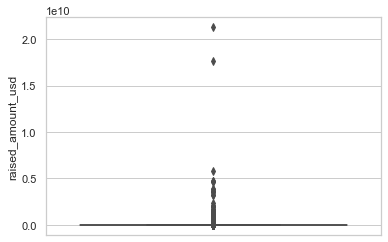

In [86]:
### Plot for raised_amount_usd

sns.boxplot(y=master_frame['raised_amount_usd'])
plt.show()

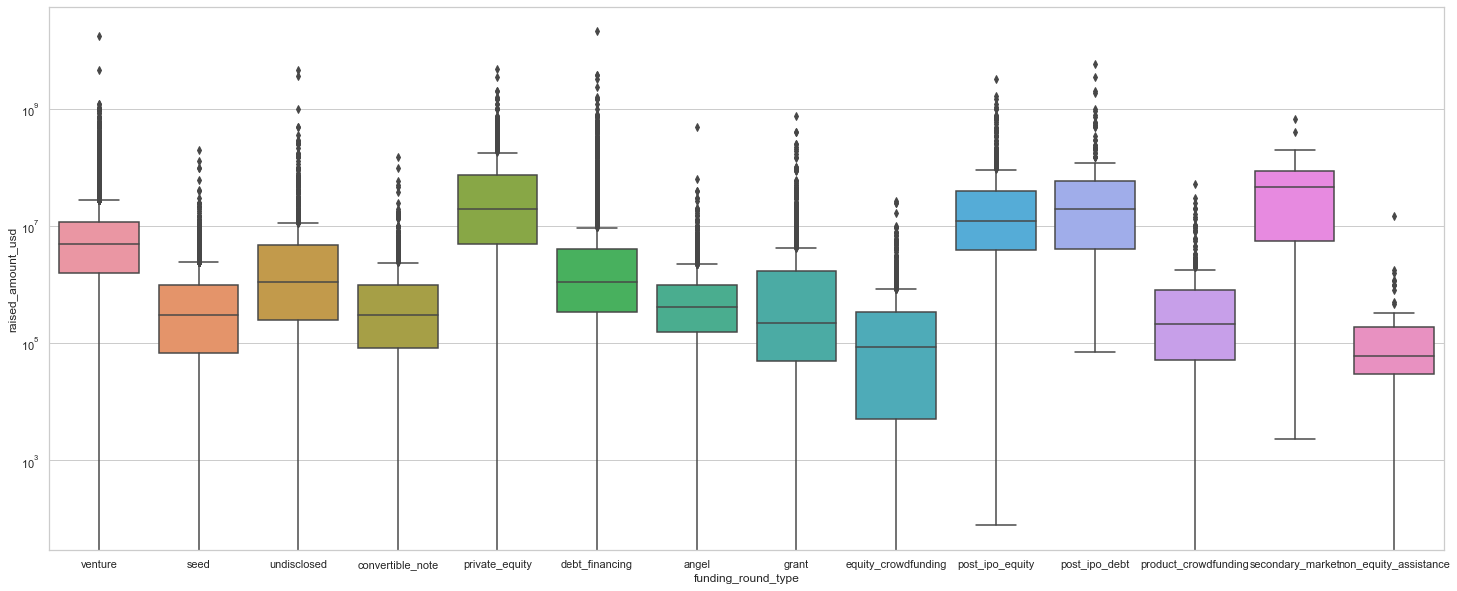

In [87]:
# Plot of Funding against Raised amount
plt.figure(figsize=(25, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')

Since the data is huge and since we need only 4 funding type we can filter only with these values and make the data simple

In [88]:
required_funds = ['venture', 'seed', 'angel', 'private_equity']

filtered_master_frame = master_frame[master_frame['funding_round_type'].isin(required_funds)]

filtered_master_frame.funding_round_type.value_counts()

venture           47809
seed              21090
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

<AxesSubplot:xlabel='funding_round_type', ylabel='raised_amount_usd'>

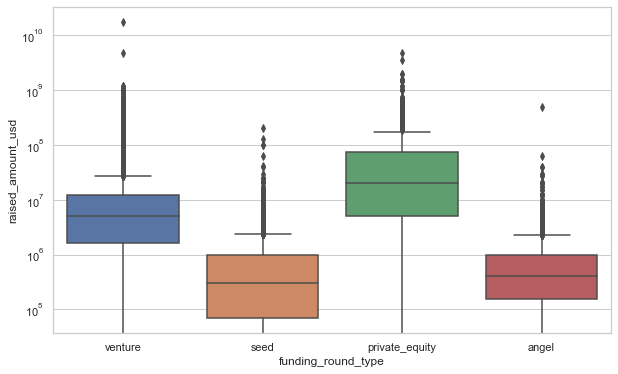

In [89]:
plt.figure(figsize=(10, 6))
plt.yscale('log')
sns.boxplot(x = 'funding_round_type', y = 'raised_amount_usd', data = filtered_master_frame)

In [90]:
# calculating representative value of the investment amount for each of the four funding types.

## calculating amount in millions for easier representation
filtered_master_frame['amount_in_millions'] = (filtered_master_frame['raised_amount_usd'].astype(float)/1000000)

## Grouping data by funding_round_type
master_by_fundtype = filtered_master_frame.groupby('funding_round_type')
master_by_fundtype['amount_in_millions'].mean().sort_values(ascending = False)

funding_round_type
private_equity    73.938486
venture           11.724223
angel              0.971574
seed               0.747916
Name: amount_in_millions, dtype: float64

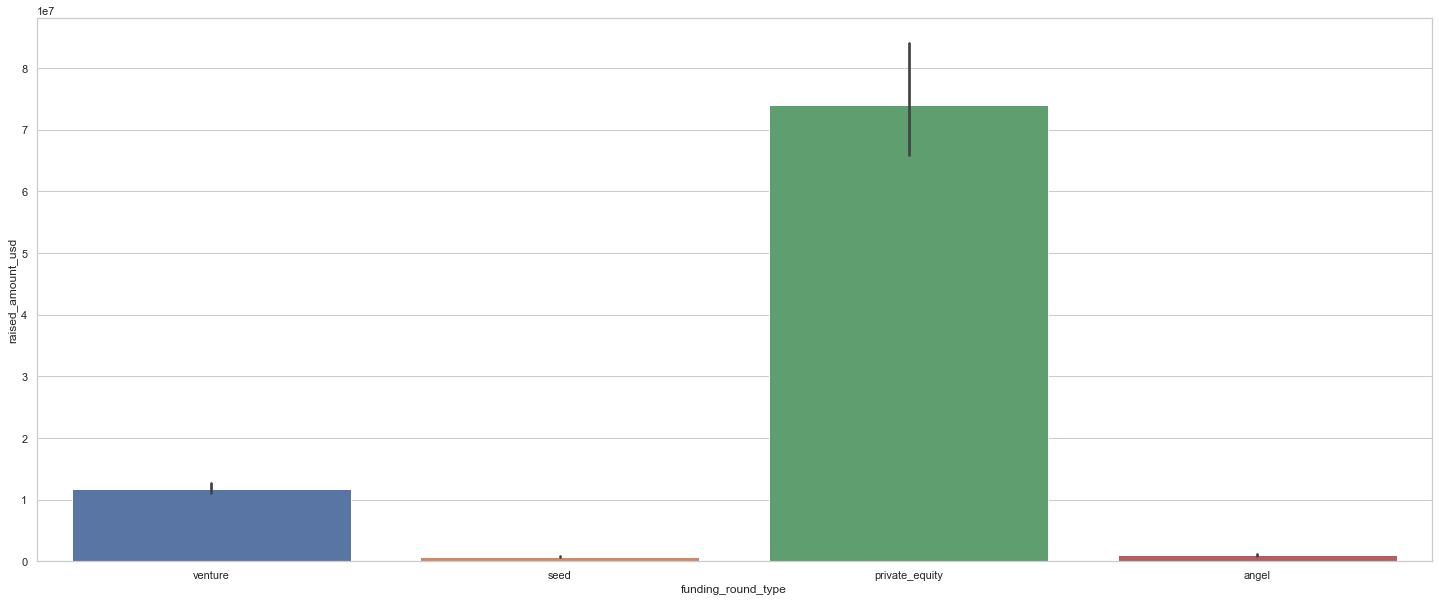

In [91]:
plt.figure(figsize=(25, 10))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=filtered_master_frame)
plt.show()

Now we have a constraint that the data needs to within 5 to 15 million USD per investment round and this keeping in mind its clear that `venture` suits the condition and its the ideal type of investment for Spark Fund

In [92]:
# Its clear the analysis is to be done for venture funding type

venture_frame = filtered_master_frame[filtered_master_frame['funding_round_type'] == 'venture']

# Remove unwanted column as the value is going to be `venture` for all rows
venture_frame = venture_frame.drop(['funding_round_type'], axis = 1)
venture_frame

,company_permalink,raised_amount_usd,name,category_list,country_code,amount_in_millions
0,/organization/-fame,10000000.0,#fame,Media,IND,10.000000
4,/organization/0-6-com,2000000.0,0-6.com,Curated Web,CHN,2.000000
8,/organization/0ndine-biomedical-inc,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN,0.719491
10,/organization/0xdata,20000000.0,H2O.ai,Analytics,USA,20.000000
11,/organization/0xdata,1700000.0,H2O.ai,Analytics,USA,1.700000
...,...,...,...,...,...,...
114931,/organization/zyraz-technology,7991547.0,Zyraz Technology,Biotechnology,MYS,7.991547
114934,/organization/zyrra,140500.0,Zyrra,E-Commerce,USA,0.140500
114936,/organization/zystor,8500000.0,Zystor,Biotechnology,USA,8.500000
114937,/organization/zytoprotec,2686600.0,Zytoprotec,Biotechnology,AUT,2.686600


### Checkpoint 3: Country Analysis
- Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.
- Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received

                                                                    Table 3.1: Analysing the Top 3 English-Speaking Countries

| Column        | Value          |
| :- |-------------: |
| Top English-speaking country     | ? |
| Second English-speaking country    | ?    |
| Third English-speaking country | ?    |

In [93]:
venture_frame['country_code'].describe()

count     47809
unique       97
top         USA
freq      35943
Name: country_code, dtype: object

In [94]:
# Calculating Amount in Millions for the better veiw
venture_frame['amount_in_millions'] = (venture_frame['raised_amount_usd'].astype(float)/1000000)


In [95]:
# sort value and get 10 countires
country_analysis_frame = venture_frame.pivot_table(values = 'amount_in_millions', index = 'country_code', aggfunc = 'sum')
country_analysis_frame = country_analysis_frame.sort_values(by = 'amount_in_millions', ascending = False)
country_analysis_frame = country_analysis_frame.iloc[:11, ]
country_analysis_frame

,amount_in_millions
country_code,
USA,420068.029342
CHN,39338.918773
GBR,20072.813004
IND,14261.508718
CAN,9482.217668
FRA,7226.851352
ISR,6854.350477
DEU,6306.921981
JPN,3167.647127


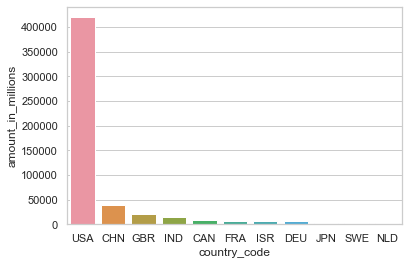

In [96]:
country_analysis_frame['country_code'] = country_analysis_frame.index
sns.barplot(x= 'country_code', y = 'amount_in_millions', data = country_analysis_frame)
plt.show()

Using external data the list of English speaking countries can be obtained as below and updated with WIKI

Source: https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language

In [97]:
import requests
import wikipedia as wp
import re

# Get data from wiki page
html = wp.page("List_of_territorial_entities_where_English_is_an_official_language").html().encode("UTF-8")

# Try to get html and merge two tables
try: 
    countries_lang = pd.read_html(html)[0]
    countries_lang = countries_lang.rename(columns={'Population': 'Population1'})
    countries_lang = countries_lang.append(pd.read_html(html)[1])
except IndexError:
    countries_lang = pd.read_html(html)[0]
    

pattern = r'\[.*?\]'

# Remove [] values in country name
countries_lang['Country'] = countries_lang['Country'].apply(lambda x: re.sub(pattern, '',str(x)))
# Remove unwanted columns
countries_lang.drop(['Nr','Region', 'Primary language?'], axis=1, inplace=True)
# Rename columns
countries_lang = countries_lang.rename(columns={'Alpha-3 code': 'Country_Code', 'Population1': 'Count'})

# Remove [] values in count columns
countries_lang['Count'] = countries_lang['Count'].apply(lambda x: re.sub(pattern, '',str(x)))
# Remove , values in count columns
countries_lang['Count'] = countries_lang['Count'].apply(lambda x: x.replace(',', ''))
# Convert to Numeric
countries_lang['Count']  =  pd.to_numeric(countries_lang['Count'], errors='ignore')

# Sort the data
countries_lang = countries_lang.sort_values(by = 'Count', ascending = False)
countries_lang

,Country,Country_Code,Count
15,India,IND,1247540000
3,United States,USA,328239523
30,Pakistan,PAK,212742631
29,Nigeria,NGA,182202000
33,Philippines17,PHL,102885100
2,United Kingdom,GBR,66040229
43,South Africa,ZAF,54956900
46,Tanzania,TZA,51820000
18,Kenya,KEN,45010056
45,Sudan,SDN,40235000


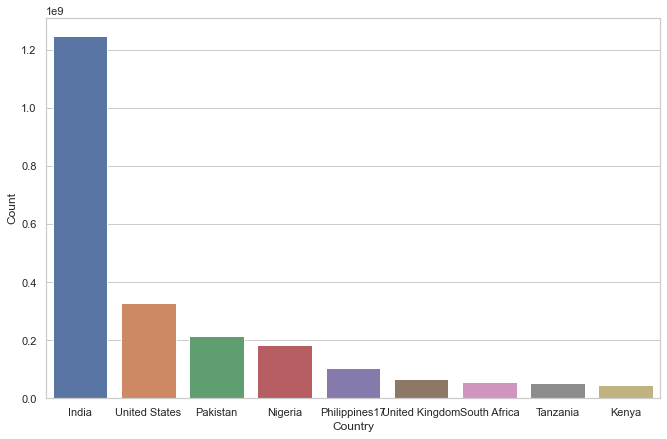

In [98]:
# Pick Top 10 Data
countries_lang = countries_lang.iloc[:9, ]
plt.figure(figsize=(11, 7))
sns.barplot(x= 'Country', y = 'Count', data = countries_lang)
plt.show()

Comparing the external data we can come to conclusion as 
1. USA
2. GBR
3. IND

In [99]:
venture_frame = venture_frame[venture_frame['country_code'].isin(['USA', 'GBR', 'IND', 'CHN'])]
venture_frame.country_code.value_counts()

USA    35943
GBR     2041
CHN     1548
IND      819
Name: country_code, dtype: int64

### Checkpoint 4: Sector Analysis 1

- When we say sector analysis, we refer to one of the eight main sectors (named main_sector) listed in the mapping file (note that ‘Other’ is one of the eight main sectors). This is to simplify the analysis by grouping the numerous category lists (named ‘category_list’) in the mapping file. For example, in the mapping file, category_lists such as ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’.
- Also, for some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.

- You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.

- Extract the primary sector of each category list from the category_list column

1. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

2. Expected Results: Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column).

 


In [100]:
# Get the primary sector value as it can be assumed based on vertical bar seperation
venture_frame['category_list'] = venture_frame['category_list'].apply(lambda x: x.split('|')[0])
venture_frame.category_list.value_counts()

Biotechnology          5924
Software               3426
Advertising            1925
Health Care            1636
Enterprise Software    1597
                       ... 
Ticketing                 1
Meeting Software          1
Disruptive Models         1
Mens Specific             1
iOS                       1
Name: category_list, Length: 571, dtype: int64

 Mapping Data Analysis
 
 Before proceeding further mapping analysis need to done to compare with our master frame

In [101]:
with open("./data/mapping.csv", 'rb') as rawdata:
    companiesCharSet = chardet.detect(rawdata.read(200000))

mapping_df = pd.read_csv("./data/mapping.csv", encoding=companiesCharSet['encoding'], engine="python")

mapping_df.info()
print(mapping_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB
(688, 10)


In [102]:
# Remove Empty values as process of data cleaning

mapping_df=mapping_df[~mapping_df.category_list.isnull()]

As we can see one row seems to empty and we have discarded it 

Next step is to melt the data as it helps in massage a DataFrame into a format where one or more columns are identifier variables while all other
columns, considered measured variables

In [103]:
melted_data = pd.melt(mapping_df,id_vars=["category_list"], value_vars=mapping_df.columns[1:])
melted_data_2 = melted_data[melted_data.value != 0]
melted_data_2

,category_list,variable,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1
...,...,...,...
6112,Social Recruiting,"Social, Finance, Analytics, Advertising",1
6113,Social Television,"Social, Finance, Analytics, Advertising",1
6114,Social Travel,"Social, Finance, Analytics, Advertising",1
6125,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [104]:
# Remove Value column as it not needed and value is anyway 1
melted_data_2.drop(['value'], axis=1, inplace=True)

melted_data_2 = melted_data_2.rename(columns = {"variable":"sector"})
melted_data_2['category_list'] = melted_data_2['category_list'].str.lower()
melted_data_2['sector'] = melted_data_2['sector'].str.lower()
melted_data_2.category_list.sort_values(ascending=True)

1844                 0notechnology
1845    0tural language processing
1846              0tural resources
4595                     0vigation
3435                            3d
                   ...            
5491                     wholesale
2744              wine and spirits
2745                      wireless
5494                         women
5495                  young adults
Name: category_list, Length: 687, dtype: object

In [105]:
# After Sorting its clear that we can see 0 is added
import re 

melted_data_2['category_list'] = melted_data_2.category_list.apply(lambda x: re.sub('[0]', 'na', str(x)))
melted_data_2.category_list.sort_values(ascending=True)

3435                  3d
3436         3d printing
3437       3d technology
5499          accounting
2752    active lifestyle
              ...       
5491           wholesale
2744    wine and spirits
2745            wireless
5494               women
5495        young adults
Name: category_list, Length: 687, dtype: object

In [106]:
grouped_data = melted_data_2.groupby('sector')
grouped_data.describe()

category_list         \
                                                count unique   
sector                                                         
automotive & sports                                22     22   
cleantech / semiconductors                         53     53   
entertainment                                      89     89   
health                                             63     63   
manufacturing                                      40     40   
news, search and messaging                         72     72   
others                                            195    195   
social, finance, analytics, advertising           153    153   

                                                                     
                                                           top freq  
sector                                                               
automotive & sports                             heavy industry    1  
cleantech / semiconductors                            lighting    1  
entertainment                                   console gaming    1  
health                                        active lifestyle    1  
manufacturing                                               3d    1  
news, search and messaging               internet radio market    1  
others                                                  advice    1  
social, finance, analytics, advertising         infrastructure    1

Now we need to merge the mapping data with our venture frame that's already been created

In [107]:
venture_frame['category_list'] = venture_frame['category_list'].str.lower()
venture_frame_mapped = venture_frame.merge(melted_data_2, how = 'left', on ='category_list')
venture_frame_mapped

,company_permalink,raised_amount_usd,name,category_list,country_code,amount_in_millions,sector
0,/organization/-fame,10000000.0,#fame,media,IND,10.000000,entertainment
1,/organization/0-6-com,2000000.0,0-6.com,curated web,CHN,2.000000,"news, search and messaging"
2,/organization/0xdata,20000000.0,H2O.ai,analytics,USA,20.000000,"social, finance, analytics, advertising"
3,/organization/0xdata,1700000.0,H2O.ai,analytics,USA,1.700000,"social, finance, analytics, advertising"
4,/organization/0xdata,8900000.0,H2O.ai,analytics,USA,8.900000,"social, finance, analytics, advertising"
...,...,...,...,...,...,...,...
40346,/organization/zyomyx-inc,14219999.0,ZYOMYX,biotechnology,USA,14.219999,cleantech / semiconductors
40347,/organization/zyomyx-inc,555016.0,ZYOMYX,biotechnology,USA,0.555016,cleantech / semiconductors
40348,/organization/zyrra,140500.0,Zyrra,e-commerce,USA,0.140500,others
40349,/organization/zystor,8500000.0,Zystor,biotechnology,USA,8.500000,cleantech / semiconductors


In [108]:
# Listing of all primary sectors which have no main sectors in the master_frame
print(venture_frame_mapped[venture_frame_mapped.sector.isnull()].category_list.sort_values(ascending=True).unique())

['adaptive equipment' 'biotechnology and semiconductor' 'enterprise 2.0'
 'greentech' 'natural gas uses' 'product search' 'racing'
 'rapidly expanding' 'retirement' 'specialty retail']


In [109]:
#Number of rows with NaN main_sector value
len(venture_frame_mapped[venture_frame_mapped.sector.isnull()])

16

In [110]:
#Retaining the rows which have main_sector values
venture_frame_mapped = venture_frame_mapped[~(venture_frame_mapped.sector.isnull())]
len(venture_frame_mapped.index)

40335

Now we need to create three separate data frames as per the checkpoint for 3 top english speaking countires falling within the 5-15 million USD range

In [111]:
# Filter only top 3 countries

venture_frame_mapped = venture_frame_mapped[(venture_frame_mapped['raised_amount_usd'] >= 5000000) &  (venture_frame_mapped['raised_amount_usd'] <= 15000000)]
venture_frame_mapped.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    1.077571e+11
GBR    5.379079e+09
CHN    4.946061e+09
IND    2.949544e+09
Name: raised_amount_usd, dtype: float64

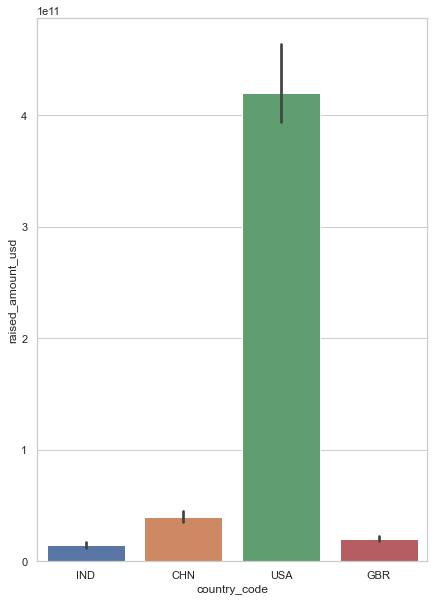

In [112]:
# Plotting sum across top 3 english official language country_code 
plt.figure(figsize=(7, 10))
sns.barplot(x="country_code", y="raised_amount_usd", data=venture_frame, estimator=sum)
plt.show()

In [113]:
# Sector Analysis - USA
D1=venture_frame_mapped[venture_frame_mapped['country_code']=='USA']

D1

,company_permalink,raised_amount_usd,name,category_list,country_code,amount_in_millions,sector
4,/organization/0xdata,8900000.0,H2O.ai,analytics,USA,8.900000,"social, finance, analytics, advertising"
5,/organization/1-mainstream,5000000.0,1 Mainstream,apps,USA,5.000000,"news, search and messaging"
23,/organization/128-technology,11999347.0,128 Technology,service providers,USA,11.999347,others
26,/organization/1366-technologies,15000000.0,1366 Technologies,manufacturing,USA,15.000000,manufacturing
27,/organization/1366-technologies,5000000.0,1366 Technologies,manufacturing,USA,5.000000,manufacturing
...,...,...,...,...,...,...,...
40338,/organization/zynga,15000000.0,Zynga,facebook applications,USA,15.000000,"social, finance, analytics, advertising"
40341,/organization/zynga,5026000.0,Zynga,facebook applications,USA,5.026000,"social, finance, analytics, advertising"
40345,/organization/zyomyx-inc,12000000.0,ZYOMYX,biotechnology,USA,12.000000,cleantech / semiconductors
40346,/organization/zyomyx-inc,14219999.0,ZYOMYX,biotechnology,USA,14.219999,cleantech / semiconductors


In [114]:
print('Total number of investments - ' ,D1.raised_amount_usd.count())
print('Total amount of investment - ' ,D1.raised_amount_usd.sum(), '\n')

# Group the data by category_list
D1_by_sector=D1.groupby('category_list')

D1_top5sector_bycount = D1_by_sector['raised_amount_usd'].count().sort_values(ascending = False).head(3)

print('Top 3 Investment name and count \n')
for key, value in D1_top5sector_bycount.items():
     print('Sector and value - ', key, value)

Total number of investments -  12063
Total amount of investment -  107757097294.0 

Top 3 Investment name and count 

Sector and value -  biotechnology 1477
Sector and value -  software 1044
Sector and value -  advertising 691


From here we can conclude the top 3 category_list
- biotechnology
- software
- advertising

In [115]:
# Find highest invested company among the 1st Top sectors
print('Company received the highest investment in biotechnology \n')
print(D1[D1['category_list']=='biotechnology'].groupby(['category_list','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(1), '\n')


# Find highest invested company among the 2nd Top sectors
print('Company received the highest investment in software \n')
print(D1[D1['category_list']=='software'].groupby(['category_list','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(1), '\n')

# Find highest invested company among the 3rd Top sectors
print('Company received the highest investment in Advertising \n')
print(D1[D1['category_list']=='advertising'].groupby(['category_list','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(1), '\n')

Company received the highest investment in biotechnology 

category_list  company_permalink     
biotechnology  /organization/biodesix    75300000.0
Name: raised_amount_usd, dtype: float64 

Company received the highest investment in software 

category_list  company_permalink        
software       /organization/bti-systems    48000000.0
Name: raised_amount_usd, dtype: float64 

Company received the highest investment in Advertising 

category_list  company_permalink         
advertising    /organization/choicestream    58300000.0
Name: raised_amount_usd, dtype: float64 



In [116]:
# Sector Analysis - GBR
D2=venture_frame_mapped[venture_frame_mapped['country_code']=='GBR']
D2

,company_permalink,raised_amount_usd,name,category_list,country_code,amount_in_millions,sector
126,/organization/365scores,5500000.0,365Scores,android,GBR,5.500000,"social, finance, analytics, advertising"
289,/organization/7digital,8468328.0,7digital,content creators,GBR,8.468328,entertainment
290,/organization/7digital,10000000.0,7digital,content creators,GBR,10.000000,entertainment
314,/organization/90min,15000000.0,90min,media,GBR,15.000000,entertainment
315,/organization/90min,5800000.0,90min,media,GBR,5.800000,entertainment
...,...,...,...,...,...,...,...
40220,/organization/zoopla,5440000.0,Zoopla,property management,GBR,5.440000,"social, finance, analytics, advertising"
40234,/organization/zopa,12900000.0,Zopa,finance,GBR,12.900000,"social, finance, analytics, advertising"
40235,/organization/zopa,15000000.0,Zopa,finance,GBR,15.000000,"social, finance, analytics, advertising"
40236,/organization/zopa,5000000.0,Zopa,finance,GBR,5.000000,"social, finance, analytics, advertising"


In [117]:
print('Total number of investments - ' ,D2.raised_amount_usd.count())
print('Total amount of investment - ' ,D2.raised_amount_usd.sum(), '\n')

# Group the data by category_list
D2_by_sector=D2.groupby('category_list')

D2_top5sector_bycount = D2_by_sector['raised_amount_usd'].count().sort_values(ascending = False).head(3)

print('Top 3 Investment name and count \n')
for key, value in D2_top5sector_bycount.items():
     print('Sector and value - ', key, value)

Total number of investments -  621
Total amount of investment -  5379078691.0 

Top 3 Investment name and count 

Sector and value -  biotechnology 70
Sector and value -  software 45
Sector and value -  advertising 35


From here we can conclude the top 3 category_list

- biotechnology
- software
- advertising

In [118]:
# Find highest invested company among the 1st Top sectors
print('Company received the highest investment in biotechnology \n')
print(D2[D2['category_list']=='biotechnology'].groupby(['category_list','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(1), '\n')


# Find highest invested company among the 2nd Top sectors
print('Company received the highest investment in software \n')
print(D2[D2['category_list']=='software'].groupby(['category_list','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(1), '\n')

# Find highest invested company among the 3rd Top sectors
print('Company received the highest investment in Advertising \n')
print(D2[D2['category_list']=='advertising'].groupby(['category_list','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(1), '\n')

Company received the highest investment in biotechnology 

category_list  company_permalink        
biotechnology  /organization/eusa-pharma    35600000.0
Name: raised_amount_usd, dtype: float64 

Company received the highest investment in software 

category_list  company_permalink           
software       /organization/electric-cloud    37000000.0
Name: raised_amount_usd, dtype: float64 

Company received the highest investment in Advertising 

category_list  company_permalink                  
advertising    /organization/celltick-technologies    37500000.0
Name: raised_amount_usd, dtype: float64 



In [119]:
# Sector Analysis - IND
D3=venture_frame_mapped[venture_frame_mapped['country_code']=='IND']
D3

,company_permalink,raised_amount_usd,name,category_list,country_code,amount_in_millions,sector
0,/organization/-fame,10000000.0,#fame,media,IND,10.000000,entertainment
68,/organization/21diamonds-india,6369507.0,21Diamonds,e-commerce,IND,6.369507,others
345,/organization/a-little-world,6410000.0,A LITTLE WORLD,finance,IND,6.410000,"social, finance, analytics, advertising"
1006,/organization/adlabs-imagica,8180000.0,Adlabs Imagica,entertainment,IND,8.180000,entertainment
1351,/organization/agile,5740000.0,Agile,finance,IND,5.740000,"social, finance, analytics, advertising"
...,...,...,...,...,...,...,...
40175,/organization/zomato,10000000.0,Zomato,content discovery,IND,10.000000,entertainment
40200,/organization/zoomcar-india,8000000.0,ZoomCar,automotive,IND,8.000000,automotive & sports
40201,/organization/zoomcar-india,11000000.0,ZoomCar,automotive,IND,11.000000,automotive & sports
40212,/organization/zoomo,5000000.0,Zoomo,internet,IND,5.000000,"news, search and messaging"


In [120]:
print('Total number of investments - ' ,D3.raised_amount_usd.count())
print('Total amount of investment - ' ,D3.raised_amount_usd.sum(), '\n')

# Group the data by category_list
D3_by_sector=D3.groupby('category_list')

D3_top5sector_bycount = D3_by_sector['raised_amount_usd'].count().sort_values(ascending = False).head(3)

print('Top 3 Investment name and count \n')
for key, value in D3_top5sector_bycount.items():
     print('Sector and value - ', key, value)

Total number of investments -  328
Total amount of investment -  2949543602.0 

Top 3 Investment name and count 

Sector and value -  e-commerce 37
Sector and value -  software 19
Sector and value -  curated web 15


From here we can conclude the top 3 category_list

- e-commerce
- software
- curated web

In [121]:
# Find highest invested company among the 1st Top sectors
print('Company received the highest investment in biotechnology \n')
print(D3[D3['category_list']=='e-commerce'].groupby(['category_list','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(1), '\n')


# Find highest invested company among the 2nd Top sectors
print('Company received the highest investment in software \n')
print(D3[D3['category_list']=='software'].groupby(['category_list','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(1), '\n')

# Find highest invested company among the 2nd Top sectors
print('Company received the highest investment in software \n')
print(D3[D3['category_list']=='curated web'].groupby(['category_list','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(1), '\n')

Company received the highest investment in biotechnology 

category_list  company_permalink         
e-commerce     /organization/firstcry-com    39000000.0
Name: raised_amount_usd, dtype: float64 

Company received the highest investment in software 

category_list  company_permalink                              
software       /organization/nxtgen-data-center-cloud-services    22300000.0
Name: raised_amount_usd, dtype: float64 

Company received the highest investment in software 

category_list  company_permalink          
curated web    /organization/bluestone-com    15000000.0
Name: raised_amount_usd, dtype: float64 



### Checkpoint 6: Plots

- A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   

- A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.                                                                                                                                                                             

- A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

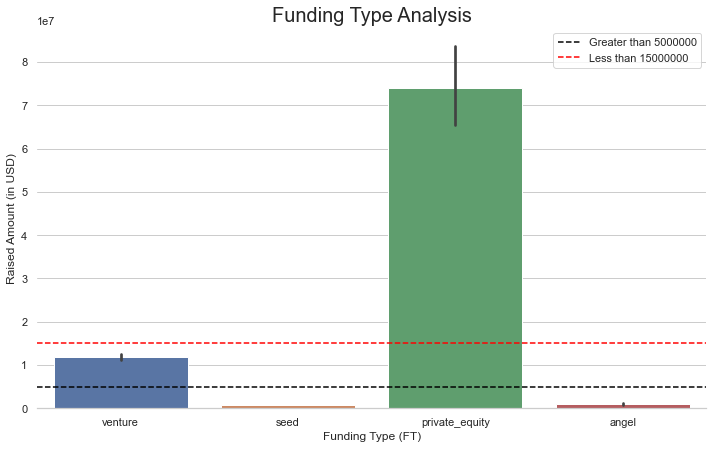

In [122]:
# Plot for Representative Amount of Investment

plt.figure(figsize=(12,7))
fund_type=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=filtered_master_frame)
fund_type.set(xlabel='Funding Type (FT)', ylabel='Raised Amount (in USD)')
fund_type.set_title('Funding Type Analysis',fontsize =20)
sns.despine();
sns.set(style="whitegrid")
sns.despine(left=True);
plt.axhline(5000000, color='black', linestyle='--', label='Greater than 5000000')
plt.axhline(15000000, color='red', linestyle='--', label='Less than 15000000')
plt.legend()
plt.show()
fig = fund_type.get_figure()
fig.savefig("output.png") 

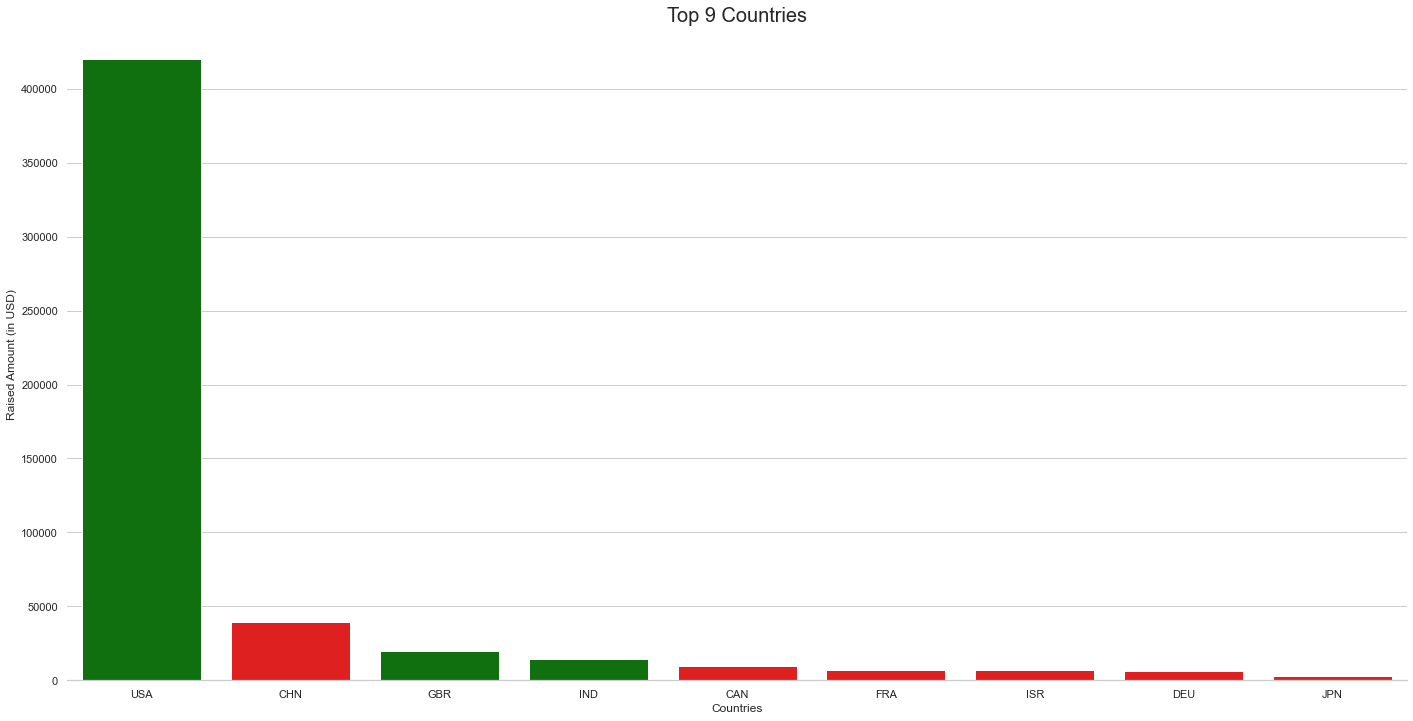

In [123]:
# A plot showing the top 9 countries against the total amount of investments of funding type FT

plt.figure(figsize=(24, 12))
colours = ['red' if ((index > 3) or x == 'CHN') else 'green' for index, x in enumerate(country_analysis_frame.country_code) ]
top9Countries = sns.barplot(x="country_code", y="amount_in_millions", data=country_analysis_frame.iloc[:9, ], estimator=sum, palette=colours)
top9Countries.set(xlabel='Countries', ylabel='Raised Amount (in USD)')
top9Countries.set_title('Top 9 Countries',fontsize =20)
sns.despine();
sns.set(style="whitegrid")
sns.despine(left=True);
plt.show()
fig = top9Countries.get_figure()
fig.savefig("country.png") 

In [124]:
# A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart

# We need to create a new data frame on this

# Add D1 required data
master_plot_investment = D1[D1['category_list'].isin(['biotechnology', 'software', 'advertising'])]
master_plot_investment

,company_permalink,raised_amount_usd,name,category_list,country_code,amount_in_millions,sector
36,/organization/170-systems,14000000.0,170 Systems,software,USA,14.000000,others
72,/organization/22nd-century-group,10000000.0,22nd Century Group,biotechnology,USA,10.000000,cleantech / semiconductors
77,/organization/23andme,9000000.0,23andMe,biotechnology,USA,9.000000,cleantech / semiconductors
78,/organization/23andme,12600000.0,23andMe,biotechnology,USA,12.600000,cleantech / semiconductors
80,/organization/23andme,9000000.0,23andMe,biotechnology,USA,9.000000,cleantech / semiconductors
...,...,...,...,...,...,...,...
40274,/organization/zuberance,8000000.0,Zuberance,advertising,USA,8.000000,"social, finance, analytics, advertising"
40280,/organization/zudy,7500000.0,Zudy,software,USA,7.500000,others
40345,/organization/zyomyx-inc,12000000.0,ZYOMYX,biotechnology,USA,12.000000,cleantech / semiconductors
40346,/organization/zyomyx-inc,14219999.0,ZYOMYX,biotechnology,USA,14.219999,cleantech / semiconductors


In [125]:
# Add D2 required data
master_plot_investment=master_plot_investment.append(D2[D2['category_list'].isin(['biotechnology', 'software','advertising'])], ignore_index=True)
master_plot_investment

,company_permalink,raised_amount_usd,name,category_list,country_code,amount_in_millions,sector
0,/organization/170-systems,14000000.0,170 Systems,software,USA,14.000000,others
1,/organization/22nd-century-group,10000000.0,22nd Century Group,biotechnology,USA,10.000000,cleantech / semiconductors
2,/organization/23andme,9000000.0,23andMe,biotechnology,USA,9.000000,cleantech / semiconductors
3,/organization/23andme,12600000.0,23andMe,biotechnology,USA,12.600000,cleantech / semiconductors
4,/organization/23andme,9000000.0,23andMe,biotechnology,USA,9.000000,cleantech / semiconductors
...,...,...,...,...,...,...,...
3357,/organization/zbd-displays,5430000.0,ZBD Displays,software,GBR,5.430000,others
3358,/organization/zeus,5755911.0,Zeus,software,GBR,5.755911,others
3359,/organization/zeus,5100000.0,Zeus,software,GBR,5.100000,others
3360,/organization/ziarco-pharma,6000000.0,Ziarco Pharma,biotechnology,GBR,6.000000,cleantech / semiconductors


In [126]:
# Add D3 required data
master_plot_investment=master_plot_investment.append(D3[D3['category_list'].isin(['e-commerce', 'software', 'curated web'])], ignore_index=True)
master_plot_investment

,company_permalink,raised_amount_usd,name,category_list,country_code,amount_in_millions,sector
0,/organization/170-systems,14000000.0,170 Systems,software,USA,14.0,others
1,/organization/22nd-century-group,10000000.0,22nd Century Group,biotechnology,USA,10.0,cleantech / semiconductors
2,/organization/23andme,9000000.0,23andMe,biotechnology,USA,9.0,cleantech / semiconductors
3,/organization/23andme,12600000.0,23andMe,biotechnology,USA,12.6,cleantech / semiconductors
4,/organization/23andme,9000000.0,23andMe,biotechnology,USA,9.0,cleantech / semiconductors
...,...,...,...,...,...,...,...
3428,/organization/teabox,6000000.0,Teabox,e-commerce,IND,6.0,others
3429,/organization/urban-ladder,5000000.0,Urban Ladder,e-commerce,IND,5.0,others
3430,/organization/voonik-com,5000000.0,Voonik,e-commerce,IND,5.0,others
3431,/organization/voylla-retail-pvt-ltd,15000000.0,Voylla Retail Pvt. Ltd.,e-commerce,IND,15.0,others


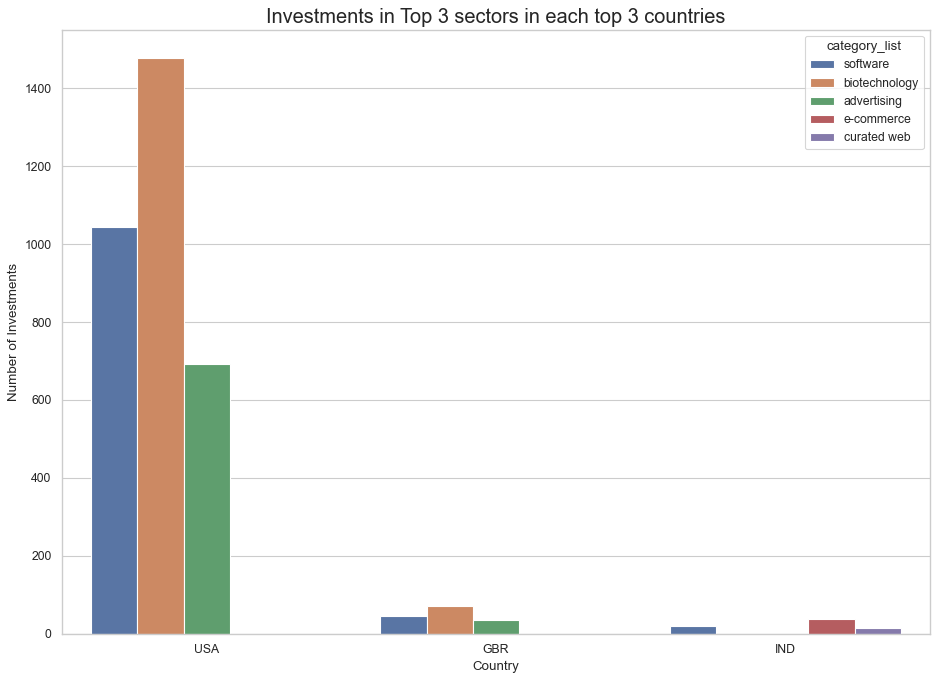

In [127]:

# set figure size for larger figure
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

s=sns.barplot(x='country_code', y='raised_amount_usd', hue="category_list", data=master_plot_investment,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in Top 3 sectors in each top 3 countries',fontsize =18)
plt.show()
fig = s.get_figure()
fig.savefig("master_inv.png")